In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
IMAGE_SIZE = (224, 224)  # Resize images to 224x224
BATCH_SIZE = 32  

In [3]:
base_dir = 'dataset/chest_xray/chest_xray'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',  # or 'rgb' if using pretrained models
    label_mode='binary'      # because it's a binary classification
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    label_mode='binary'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    label_mode='binary'
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
len(train_ds)

163

In [6]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [7]:
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)

Image shape: (32, 224, 224, 1)
Label shape: (32, 1)


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_584\2219863744.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(labels[0].numpy())


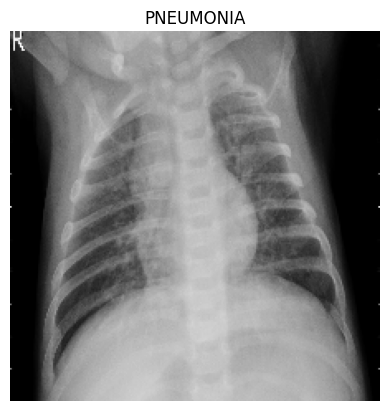

In [9]:
import matplotlib.pyplot as plt

# Remove channel dimension if grayscale
image = images[0].numpy().squeeze()
label = int(labels[0].numpy())

plt.imshow(image, cmap='gray')
plt.title("PNEUMONIA" if label == 1 else "NORMAL")
plt.axis('off')
plt.show()


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [10]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D , MaxPooling2D, Dropout

In [11]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [12]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

In [13]:
model = Sequential([
    
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 1)),  
    MaxPooling2D((2, 2)),

    Conv2D(64, 3, activation='relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    
)


Epoch 1/5


c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 12/163 ━━━━━━━━━━━━━━━━━━━━ 2:22 946ms/step - accuracy: 0.5367 - loss: 2.1759

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.7505 - loss: 2.8612


[2.908930540084839, 0.7275640964508057]

--> overfitting

addied data aug , drop out 0.2->0.5

In [13]:
model = Sequential([
    data_augmentation,
    
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 1)),  
    MaxPooling2D((2, 2)),

    Conv2D(64, 3, activation='relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    
)


Epoch 1/5


c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.7184 - loss: 0.8938 - val_accuracy: 0.7500 - val_loss: 0.5707
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.8836 - loss: 0.2707 - val_accuracy: 0.8125 - val_loss: 0.5334
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9143 - loss: 0.2120 - val_accuracy: 0.8750 - val_loss: 0.4198
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9206 - loss: 0.1979 - val_accuracy: 0.8125 - val_loss: 0.4604
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.9303 - loss: 0.1707 - val_accuracy: 0.7500 - val_loss: 0.6982


In [14]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - accuracy: 0.7987 - loss: 0.4775


[0.5269765853881836, 0.7900640964508057]

reduce no.of filters

In [15]:

model = Sequential([
    data_augmentation,
    
    Conv2D(16, 3, activation='relu', input_shape=(224, 224, 1)),  
    MaxPooling2D((2, 2)),

    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
    

    
)


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 465ms/step - accuracy: 0.7660 - loss: 0.5003 - val_accuracy: 0.6250 - val_loss: 0.9765
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 442ms/step - accuracy: 0.9117 - loss: 0.2253 - val_accuracy: 0.8125 - val_loss: 0.4722
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 443ms/step - accuracy: 0.9220 - loss: 0.2020 - val_accuracy: 0.8750 - val_loss: 0.4140
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 441ms/step - accuracy: 0.9305 - loss: 0.1774 - val_accuracy: 0.8750 - val_loss: 0.4545
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 477ms/step - accuracy: 0.9412 - loss: 0.1610 - val_accuracy: 0.6875 - val_loss: 0.7094


In [ ]:
# Save the trained model
## model.save("pneumonia_model.keras")

adding early stopping plus batch normalziation

In [16]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.8614 - loss: 0.4026


[0.4366355240345001, 0.8413461446762085]

In [13]:
from tensorflow.keras.callbacks import EarlyStopping


# Define early stopping
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Define the model
model = Sequential([
    data_augmentation,
    
    Conv2D(16, 3, activation='relu', input_shape=(224, 224, 1)),  
    MaxPooling2D((2, 2)),

    Conv2D(32, 3, activation='relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10


c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 434ms/step - accuracy: 0.7277 - loss: 0.9254 - val_accuracy: 0.6250 - val_loss: 0.8924
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 432ms/step - accuracy: 0.8658 - loss: 0.3099 - val_accuracy: 0.8125 - val_loss: 0.5503
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 425ms/step - accuracy: 0.8951 - loss: 0.2458 - val_accuracy: 0.6875 - val_loss: 0.8691
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 508ms/step - accuracy: 0.9235 - loss: 0.2056 - val_accuracy: 0.7500 - val_loss: 0.4733
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 434ms/step - accuracy: 0.9310 - loss: 0.1789 - val_accuracy: 0.6250 - val_loss: 1.0563
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.9265 - loss: 0.1851 - val_accuracy: 0.6875 - val_loss: 0.8935
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 424ms/step - accuracy: 0.9337 - loss: 0.1699 - val_accuracy: 0.6250 - val_loss: 1.1215


In [14]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8504 - loss: 0.3076


[0.30868539214134216, 0.8589743375778198]

adding batch normaliation

In [22]:
from tensorflow.keras.layers import BatchNormalization, Activation, Input

# Early stopping callback
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Define the model
model = Sequential([
    Input(shape=(224, 224, 1)),
    data_augmentation,

    Conv2D(16, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Dropout(0.5),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8747 - loss: 0.3258 - val_accuracy: 0.5000 - val_loss: 2.4870
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 580s 4s/step - accuracy: 0.9494 - loss: 0.1458 - val_accuracy: 0.5000 - val_loss: 2.6224
Epoch 3/10
127/163 ━━━━━━━━━━━━━━━━━━━━ 35s 973ms/step - accuracy: 0.9480 - loss: 0.1290

KeyboardInterrupt: 

In [21]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.6391 - loss: 1.3025


[1.3033663034439087, 0.6410256624221802]

USING TRANSFER LEARNING

In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input

# Step 1: Convert grayscale to RGB
train_ds = train_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))
val_ds = val_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))
test_ds = test_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))

# Step 2: Preprocess for DenseNet121
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))


In [34]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping



# Load base model
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Build the model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callback
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Train
history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[early_stop])



Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.6790 - loss: 0.6377 - val_accuracy: 0.5000 - val_loss: 0.8190
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.7399 - loss: 0.5867 - val_accuracy: 0.5000 - val_loss: 0.8048
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.7399 - loss: 0.5790 - val_accuracy: 0.5000 - val_loss: 0.8047
Epoch 4/10
 17/163 ━━━━━━━━━━━━━━━━━━━━ 5:27 2s/step - accuracy: 0.7154 - loss: 0.6096

KeyboardInterrupt: 

In [32]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.7949 - loss: 0.3853


[0.39183351397514343, 0.7900640964508057]